In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [2]:
import yfinance as yf
ticker = "AAPL" 
start_date = "2020-01-01"
end_date = "2021-12-31"
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
data = data[['Close']] 
data['Prediction'] = data['Close'].shift(-1)  
data.dropna(inplace=True) 

<ipython-input-3-6e9145c075fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction'] = data['Close'].shift(-1)  # Create a column for the next day's closing price
<ipython-input-3-6e9145c075fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [4]:
X = data[['Close']]
y = data['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
predictions = model.predict(X_test)


In [7]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.4728945713732333


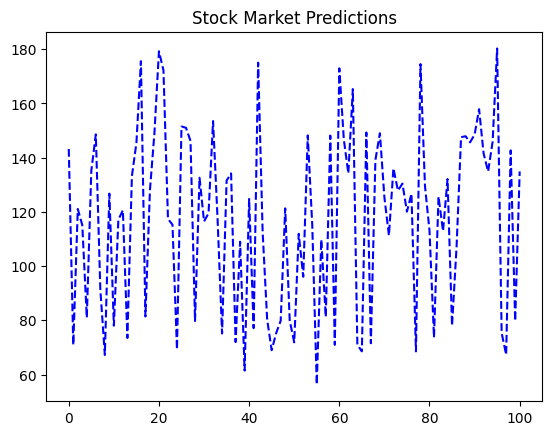

In [16]:
plt.title("Stock Market Predictions")
plt.plot(predictions,color = 'blue',linestyle = "--")